In [1]:
import os
path = os.path.join('/home/scuervo/Documents/dev/reservoirpy')
import sys
sys.path.insert(0,path)

import numpy as np
from datetime import date, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from reservoirpy.wellproductivitypy import decline as dc
from reservoirpy.wellpy import path as ph


In [25]:
periods=pd.period_range(start=date(2021,1,1),end=date(2035,1,1),freq='A')
price = pd.Series(np.full(periods.shape,50/1000), index = periods, name='time')


In [26]:
pr1 = ph.well(name='pr-1',fq='A')


p90 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0, di=0.4, ti=date(2021,1,1),
                                     econ_limit=1000, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-4000,
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
        
    
    },
    'wo':{
        'declination':dc.declination(qi=3000, b=0, di=0.4, ti=date(2021,1,1),
                                     econ_limit=200, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-400,
        'depend_start':'initial',
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    
    }
}

p50 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0.5, di=0.4, ti=date(2021,1,1),
                                     econ_limit=1000, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-4000,
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    
    },
    'wo':{
        'declination':dc.declination(qi=3000, b=0.5, di=0.4, ti=date(2021,1,1),
                                     econ_limit=200, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-400,
        'depend_start':'initial',
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    
    }
}

p10 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=1, di=0.4, ti=date(2021,1,1),
                                     econ_limit=1000, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-4000,
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    
    },
    'wo':{
        'declination':dc.declination(qi=3000, b=1, di=0.4, ti=date(2021,1,1),
                                     econ_limit=200, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-400,
        'depend_start':'initial',
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    
    }
}


pr1.add_schedule(
    {
        'p90':p90,
        'p50':p50,
        'p10':p10
    }
)



In [27]:
f1 = pr1.schedule_forecast(fq_output='A')
f1

,case,period,time,qo,vo,np,datetime
0,p10,initial,2021,2524.716356,921521.47,921521.45,2021-01-01
1,p10,initial,2022,1885.510795,688211.44,1609732.85,2022-01-01
2,p10,initial,2023,1505.445479,549487.60,2159220.42,2023-01-01
3,p10,initial,2024,1252.921503,458569.27,2617789.74,2024-01-01
4,p10,initial,2025,1073.447107,389661.30,3007451.02,2025-01-01
5,p10,wo,2026,2483.269408,839345.06,839345.04,2026-01-01
6,p10,wo,2027,1881.602329,686784.85,1526129.85,2027-01-01
7,p10,wo,2028,1502.571366,549941.12,2076070.94,2028-01-01
8,p10,wo,2029,1250.897014,456577.41,2532648.40,2029-01-01
9,p50,initial,2021,2501.256137,912958.49,912958.45,2021-01-01


In [28]:
pr1.cashflow['p90']['income'].cashflow()

2021    45149.6755
2022    30264.7330
2023    24837.5485
2024    40820.8860
2025    27272.3530
2026    18281.2045
2027    12254.2560
2028     8232.5665
2029     5500.1640
Freq: A-DEC, Name: income_pr-1, dtype: float64

In [29]:
pr1.cashflow

{'p90': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7fe5cd220a60>,
  'income': <reservoirpy.cashflows.timeseries.cash at 0x7fe5cd1ecf70>,
  'var_opex': <reservoirpy.cashflows.timeseries.cash at 0x7fe5cd2535e0>},
 'p50': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7fe5cd1ecd90>,
  'income': <reservoirpy.cashflows.timeseries.cash at 0x7fe5cd263d00>,
  'var_opex': <reservoirpy.cashflows.timeseries.cash at 0x7fe5cd33c8b0>},
 'p10': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7fe5cd1dfaf0>,
  'income': <reservoirpy.cashflows.timeseries.cash at 0x7fe5cd422eb0>,
  'var_opex': <reservoirpy.cashflows.timeseries.cash at 0x7fe5cd33c4f0>}}

<AxesSubplot:xlabel='datetime', ylabel='qo'>

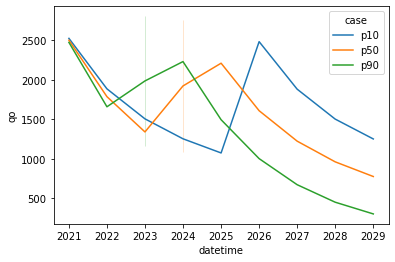

In [30]:
sns.lineplot(data=f1, x='datetime', y='qo', hue='case')

In [31]:
s,n=pr1.get_fcf(prate=[0,5,10,15],pyr=12)

In [32]:
s

[      total_income  total_opex  total_capex  net_income  free_cash_flow  \
 2021    45149.6755  -9029.9351      -4000.0  36119.7404      32119.7404   
 2022    30264.7330  -6052.9466          0.0  24211.7864      24211.7864   
 2023    24837.5485  -4967.5097       -400.0  19870.0388      19470.0388   
 2024    40820.8860  -8164.1772          0.0  32656.7088      32656.7088   
 2025    27272.3530  -5454.4706          0.0  21817.8824      21817.8824   
 2026    18281.2045  -3656.2409          0.0  14624.9636      14624.9636   
 2027    12254.2560  -2450.8512          0.0   9803.4048       9803.4048   
 2028     8232.5665  -1646.5133          0.0   6586.0532       6586.0532   
 2029     5500.1640  -1100.0328          0.0   4400.1312       4400.1312   
 
       cum_free_cash_flow case  well  
 2021          32119.7404  p90  pr-1  
 2022          56331.5268  p90  pr-1  
 2023          75801.5656  p90  pr-1  
 2024         108458.2744  p90  pr-1  
 2025         130276.1568  p90  pr-1  
 202

In [33]:
n

{'p90': {0: 165690.70960000003,
  5: 163788.94323771898,
  10: 161929.81522600428,
  15: 160112.08822194426},
 'p50': {0: 197872.77360000007,
  5: 195116.42787934348,
  10: 192429.36553286662,
  15: 189809.40523728987},
 'p10': {0: 217203.98080000008,
  5: 213835.25922334334,
  10: 210557.42324435417,
  15: 207367.46486988987}}

# add finantials

In [8]:
periods=pd.period_range(start=date(2021,1,1),end=date(2030,1,1),freq='A')

In [9]:
periods[0].to_timestamp()

Timestamp('2021-01-01 00:00:00')

In [10]:
[8]*4+[1]*2

[8, 8, 8, 8, 1, 1]

In [18]:
pr2 = ph.well(name='pr-1',fq='A')


p90 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000,
        'fix_opex':pd.Series([-180]*5 + [-140]*5,index=periods),
        'var_oil_opex': -12/1000,
        'oil_price': 45/1000,
        'abandonment':-200
}}

p50 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0.5, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000,
        'fix_opex':pd.Series(np.linspace(140,180,10),index=periods),
        'var_oil_opex': pd.Series([-12/1000]*4+[-15/1000]*6,index=periods),
        'oil_price': pd.Series(np.linspace(40,65,10),index=periods)/1000,
        'abandonment':-200
}}

p10 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=1, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000,
        'fix_opex':pd.Series(np.linspace(140,180,10),index=periods),
        'var_oil_opex': pd.Series([-12/1000]*4+[-15/1000]*6,index=periods),
        'oil_price': pd.Series(np.linspace(40,45,10),index=periods)/1000,
        'abandonment':-200
}}

pr2.add_schedule(
    {
        'p90':p90,
        'p50':p50,
        'p10':p10
    }
)

In [19]:
f2 = pr2.schedule_forecast()
f2

,qo,vo,np,period,case
time,,,,,
2021-12-31,2013.17,734805.28,734805.28,initial,p90
2022-12-31,1349.46,492554.71,1227359.98,initial,p90
2023-12-31,904.57,331073.87,1558433.85,initial,p90
2024-12-31,605.69,221076.69,1779510.54,initial,p90
2025-12-31,406.01,148192.14,1927702.67,initial,p90
2021-12-31,2085.24,761111.59,761111.59,initial,p50
2022-12-31,1531.81,559111.04,1320222.63,initial,p50
2023-12-31,1172.68,429200.17,1749422.80,initial,p50
2024-12-31,925.93,337962.96,2087385.77,initial,p50


In [21]:
pr2.cashflow['p50']['fix_opex'].cashflow()

2021    140.000000
2022    144.444444
2023    148.888889
2024    153.333333
2025    157.777778
2026    162.222222
2027    166.666667
2028    171.111111
2029    175.555556
2030    180.000000
Freq: A-DEC, Name: fix_opex_pr-1, dtype: float64

In [25]:
pr2.get_fcf(case='p10',coc=0.12)

(      total_income   total_opex  total_capex  total_depreciation  \
 2021  28805.405344 -9253.066960      -4000.0         -882.324715   
 2022  22711.419966 -7160.002716          0.0         -686.133112   
 2023  18886.135207 -5843.186911          0.0         -562.857328   
 2024  16144.230917 -4900.512867          0.0         -474.726032   
 2025  14178.222222 -5317.222222          0.0         -411.429224   
 2026  12674.803783 -4668.660078          0.0         -363.025782   
 2027  11519.368484 -4167.543883          0.0         -325.702445   
 2028  10524.317572 -3738.583089       -200.0         -293.801361   
 2029      0.000000   175.555556          0.0            0.000000   
 2030      0.000000   180.000000          0.0            0.000000   
 
               ebit          tax    net_income  free_cash_flow  \
 2021  18670.013669  6161.104511  12508.909158     9391.233873   
 2022  14865.284139  4905.543766   9959.740373    10645.873485   
 2023  12480.090967  4118.430019   8361.6

## Group wells

In [13]:
w1 = ph.well(name='w1',fq='A')
w2 = ph.well(name='w2',fq='A')
w3 = ph.well(name='w3',fq='A')

gr1 = ph.wells_group(w1,w2,w3)
gr1.wells

{'w1': <reservoirpy.wellpy.path.wells.well at 0x7f13d90c4e20>,
 'w2': <reservoirpy.wellpy.path.wells.well at 0x7f13d90c4ca0>,
 'w3': <reservoirpy.wellpy.path.wells.well at 0x7f13d90c46a0>}

In [14]:

p90 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000
}}

p50 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0.5, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000
}}

p10 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=1, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000
}}

pr1.add_schedule(
    {
        'p90':p90,
        'p50':p50,
        'p10':p10
    }
)